<a href="https://colab.research.google.com/github/jalee29/marilyn-monroe/blob/main/Copy_of_160_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
from PIL import Image
from matplotlib.image import imread
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import io
from scipy.stats import mode
from scipy.spatial import distance
from sklearn.cluster import DBSCAN

In [ ]:
OrangeUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203191222-16N8MP7K7EACDQ1EVJ7E/shot_orange_marilyn_1964-19604.png?format=750w'

with urllib.request.urlopen(OrangeUrl) as response:
    image_data = response.read()

image_bytes = io.BytesIO(image_data)

image = Image.open(image_bytes)

orange = image.convert("RGB") #gives image

orange_array = np.array(orange) #gives RGB matrix

[[209 223 220 ... 225 229 218]
 [213 241 241 ... 227 228 204]
 [219 250 244 ... 228 234 205]
 ...
 [222 226 226 ... 223 227 214]
 [223 225 228 ... 224 223 214]
 [229 217 217 ... 216 220 226]]
[[117 111 112 ... 115 114 118]
 [109 113 116 ... 124 121 115]
 [111 115 111 ... 118 120 115]
 ...
 [115 126 120 ... 121 128 118]
 [110 122 120 ... 128 127 116]
 [112 114 111 ... 121 121 120]]
[[110 101  97 ...  61  71  84]
 [100 100  96 ...  88  96 101]
 [ 96  95  85 ...  89 105 109]
 ...
 [ 61  91  90 ...  92  91  72]
 [ 67  98 105 ...  90  84  63]
 [ 82 102 112 ...  67  62  55]]


In [ ]:
OR = orange_array[:,:,0].reshape((-1,1))
OG = orange_array[:,:,1].reshape((-1,1))
OB = orange_array[:,:,2].reshape((-1,1))

orange_array
mode_rgb = mode(orange_array, axis=0)

<ipython-input-5-f04b656ea94b>:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_rgb = mode(orange_array, axis=0)


In [ ]:
yval = []
#this one for y but 1 to 751
for i in range(1,751):
  for j in range(1,751):
    yval.append(j)
ypos = np.array(yval).reshape((-1,1))

xval = []

for i in range(1, 751):
  for j in range(1,751):
    xval.append(i)
xpos = np.array(xval).reshape((-1,1))

In [ ]:
xm = np.mean(xpos)
xsd = np.std(xpos)
Xc = (xpos - xm)/xsd

ym = np.mean(ypos)
ysd = np.std(ypos)
Yc = (ypos - ym)/ysd

ORm = np.mean(OR)
ORsd = np.std(OR)
ORC = (OR - ORm)/ORsd

OGm = np.mean(OG)
OGsd = np.std(OG)
OGC = (OG - OGm)/OGsd

OBm = np.mean(OB)
OBsd = np.std(OB)
OBC = (OB - OBm)/OBsd

In [ ]:
orangedata = np.concatenate((2*ORC, 2*OGC, 2*OBC), axis = 1)

orangedata

k = 4  # Number of clusters
kmeans = KMeans(n_clusters=k) #need to set center value to be consistent choose mode colors want the most popular colors
kmeans.fit(orangedata)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
labels.reshape((750,750))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ...,
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3]], dtype=int32)

In [ ]:
orange

In [ ]:
Ora = np.array([[255, 165, 0]]) #orange
Yel = np.array([[255, 255, 0]]) #yellow
Bla = np.array([[0, 0, 0]]) #black
Pin = np.array([[255, 192, 203]]) #pink

OrangeColCenter = np.concatenate((Ora, Yel, Bla, Pin))

OrangeColCenterSR = (OrangeColCenter[:,0] - ORm)/ORsd
OrangeColCenterSG = (OrangeColCenter[:,1] - OGm)/OGsd
OrangeColCenterSB = (OrangeColCenter[:,2] - OBm)/OBsd

OrangeColCentroidS = np.concatenate((OrangeColCenterSR,OrangeColCenterSG,OrangeColCenterSB)).reshape((3,4)).T #Orange, yellow, black, pink

In [ ]:
Ora = np.array([[255, 165, 0]]) #orange
Yel = np.array([[255, 255, 0]]) #yellow
Bla = np.array([[0, 0, 0]]) #black
Pin = np.array([[255, 192, 203]]) #pink

In [ ]:
orangeCol = orange_array.reshape((-1,3))

k = 25  # Number of clusters
kmeansCol = KMeans(n_clusters=k) #need to set center value to be consistent choose mode colors want the most popular colors
kmeansCol.fit(orangeCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))

NameError: ignored

In [ ]:
centers

array([[226.50309666, 122.94311425,  83.9739821 ],
       [ 51.29117715,  47.50034554,  44.91953796],
       [225.62800564, 172.70917141, 185.54610033],
       [240.04274034, 192.43742878,  88.5393419 ],
       [185.00263668, 146.58652604,  74.24854714],
       [ 11.72412157,  14.83266507,  17.06424826],
       [162.4601845 , 201.75209416, 200.9949104 ],
       [124.77208144, 122.65072506, 146.33103852],
       [195.2427156 , 145.08370345, 156.51300698],
       [112.39473334,  86.25076602,  65.65131667]])

In [ ]:
ORm = np.mean(OR)
ORsd = np.std(OR)
ORC = (OR - ORm)/ORsd

OGm = np.mean(OG)
OGsd = np.std(OG)
OGC = (OG - OGm)/OGsd

OBm = np.mean(OB)
OBsd = np.std(OB)
OBC = (OB - OBm)/OBsd

CR = centers[:,0] * ORsd + ORm
CG = centers[:,1] * OGsd + OGm
CB = centers[:,2] * OBsd + OBm

centers = np.concatenate((CR,CG,CB))/255
centers = centers.reshape((-1,3))

In [ ]:
label_color_map = dict(zip(np.unique(labelsCol), centers/255))
label_color_map

{0: array([0.37715597, 0.45416001, 0.56781841]),
 1: array([0.88948542, 0.48318764, 0.33111307]),
 2: array([0.02028314, 0.03067766, 0.03965662]),
 3: array([0.89799749, 0.69188281, 0.7438725 ]),
 4: array([0.93643563, 0.74523567, 0.32982341]),
 5: array([0.35153785, 0.30214575, 0.32918348]),
 6: array([0.23841312, 0.21513291, 0.22077761]),
 7: array([0.48878409, 0.39447431, 0.21460559]),
 8: array([0.7923017 , 0.58785155, 0.63481845]),
 9: array([0.64239259, 0.79681474, 0.79357629]),
 10: array([0.62953258, 0.50282036, 0.26350214]),
 11: array([0.52317788, 0.40333866, 0.43765006]),
 12: array([0.86656802, 0.65239516, 0.70242252]),
 13: array([0.67292254, 0.50473935, 0.5497029 ]),
 14: array([0.86876136, 0.6806847 , 0.30092557]),
 15: array([0.67694656, 0.23853515, 0.20295365]),
 16: array([0.0766847 , 0.09150716, 0.10053464]),
 17: array([0.87656482, 0.70450903, 0.39968422]),
 18: array([0.89145112, 0.87079089, 0.85361492]),
 19: array([0.15539941, 0.15386859, 0.14879613]),
 20: array

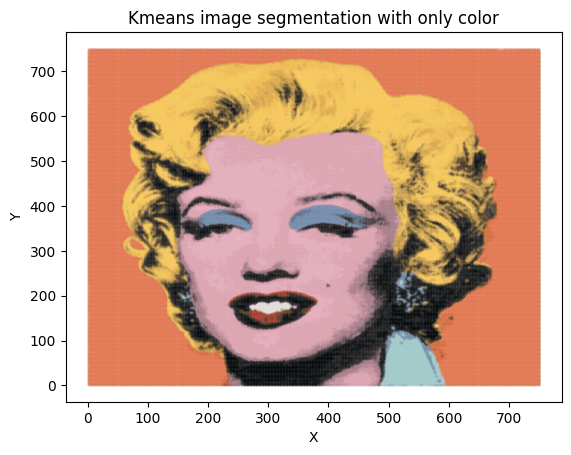

In [ ]:
for label in set(labelsCol):
    mask = labelsCol == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=label_color_map[label], label=labelsCol, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans image segmentation with only color')
plt.show()

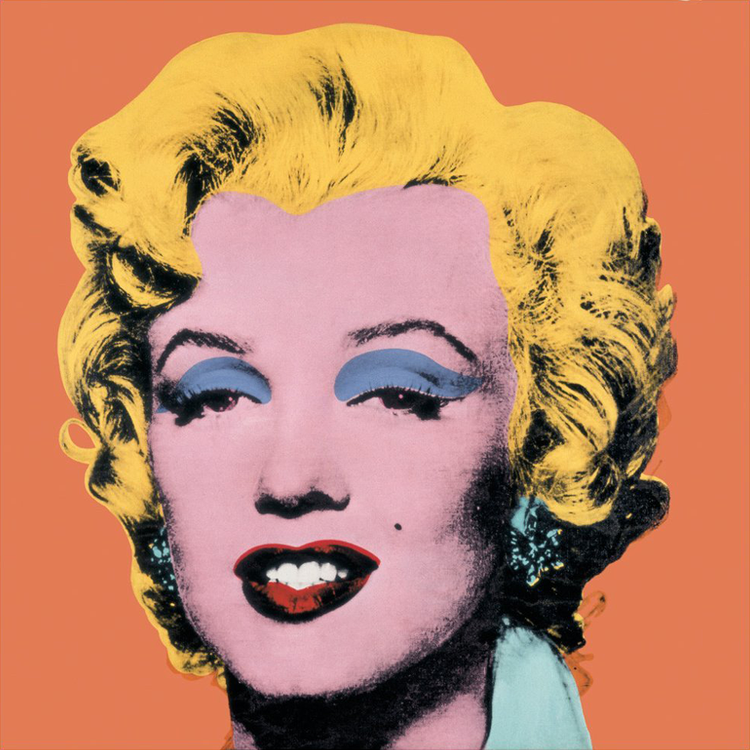

In [ ]:
orange

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


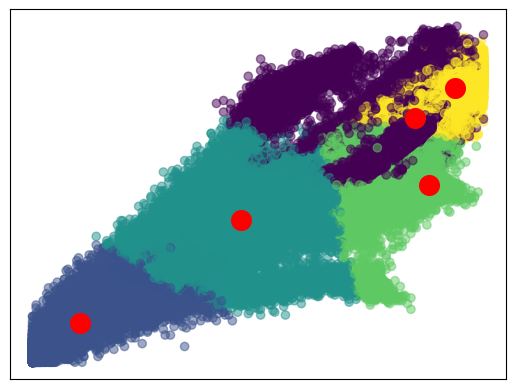

In [ ]:
# use dbscan for color segmenation

#try mean shift clustering might not work since we assume that the colors are from the same distribution but this might conflict with similar colors such as gold and orange

#maybe spectral clustering

In [ ]:
orangeCol = orange_array.reshape((-1,3))
orangeCol

array([[209, 117, 110],
       [223, 111, 101],
       [220, 112,  97],
       ...,
       [216, 121,  67],
       [220, 121,  62],
       [226, 120,  55]], dtype=uint8)

In [ ]:
Or = orangeCol[:,0]
Og = orangeCol[:,1]
Ob = orangeCol[:,2]

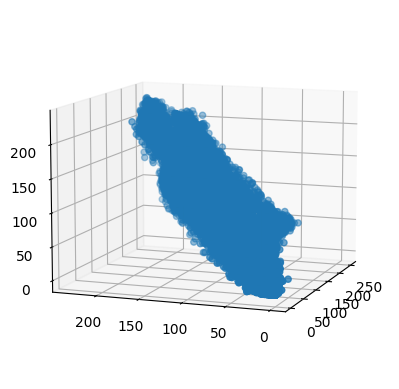

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Or,Og,Ob)
ax.view_init(10, 200)
plt.show()

In [ ]:
from sklearn.manifold import MDS
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler


In [ ]:
mds = MDS(n_components=2,metric=True,
          n_init=4,
          max_iter=300,
          verbose=0,
          eps=0.0001,
          n_jobs=None,
          dissimilarity='euclidean')  # Reduce to 2 dimensions
embedding = mds.fit_transform(orangeCol)
ax = fig.add_subplot(111)
plt.scatter(embedding[:, 0], embedding[:, 1])
plt.title("MDS on df2")

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(orange_array.reshape((-1,3)))
dbscan.labels_

In [ ]:
orangeCol = np.concatenate((OR, OG, OB), axis = 1)

orangedata
k = 8  # Number of clusters
kmeansCol = KMeans(n_clusters=k) #need to set center value to be consistent choose mode colors want the most popular colors
kmeansCol.fit(orangeCol)
labelsCol = kmeansCol.labels_
centers = kmeansCol.cluster_centers_
labelsCol.reshape((750,750))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2]], dtype=int32)

In [ ]:
centers

array([[239.04010934, 191.69446922,  88.34252869],
       [ 63.32231086,  56.05851132,  51.36914565],
       [225.01286064, 124.30324963,  83.63337252],
       [162.8858205 , 201.93818375, 201.19787573],
       [ 14.51854829,  17.44480854,  19.47184782],
       [146.92896595, 128.9957735 , 147.67076509],
       [223.34264526, 170.40449126, 183.12429119],
       [133.88450266, 100.99000888,  68.56230018]])

In [ ]:
Ora = np.array([[255, 165, 0]]) #orange
Yel = np.array([[255, 255, 0]]) #yellow
Bla = np.array([[0, 0, 0]]) #black
Pin = np.array([[255, 192, 203]]) #pink

OrangeColCenter = np.concatenate((Ora, Yel, Pin, Bla))

OrangeColCenterSR = (OrangeColCenter[:,0] - ORm)/ORsd
OrangeColCenterSG = (OrangeColCenter[:,1] - OGm)/OGsd
OrangeColCenterSB = (OrangeColCenter[:,2] - OBm)/OBsd

OrangeColCentroidS = np.concatenate((OrangeColCenterSR,OrangeColCenterSG,OrangeColCenterSB)).reshape((3,4)).T #Orange, yellow, black, pink

#yellow pos 400, 600
#pink pos 300, 300
#black pos 300, 50
#orange 100, 200

OrangePosO = np.array([[100, 200]])
OrangePosY = np.array([[400, 600]])
OrangePosP = np.array([[300, 300]])
OrangePosB = np.array([[300, 50]])


OrangePos = np.concatenate((OrangePosO,OrangePosY,OrangePosP,OrangePosB))
Ox = (OrangePos[:,0] - xm)/xsd
Oy = (OrangePos[:,1] - ym)/ysd

OPos = np.concatenate((Ox,Oy)).reshape((2,4)).T

OPosCenter = np.concatenate((OPos, OrangeColCentroidS), axis = 1)

In [ ]:
OPosCenter[:3,:]

array([[-1.27248112, -0.8106005 ,  0.87999313,  0.60836377, -1.97230072],
       [ 0.11316075,  1.03692201,  0.87999313,  2.35496119, -1.97230072],
       [-0.34871987, -0.34871987,  0.87999313,  1.132343  ,  1.98078604]])

In [ ]:
orangePos = np.concatenate((.8*Xc, .8*Yc, 2*ORC, 2*OGC, 2*OBC), axis = 1) #try incorporating positional data

k = 4  # Number of clusters
kmeansPos = KMeans(n_clusters=k, init = OPosCenter) #need to set center value to be consistent choose mode colors want the most popular colors
kmeansPos.fit(orangePos)
labelsPos = kmeansPos.labels_
centersPos = kmeansPos.cluster_centers_
labelsPos.reshape((750,750))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

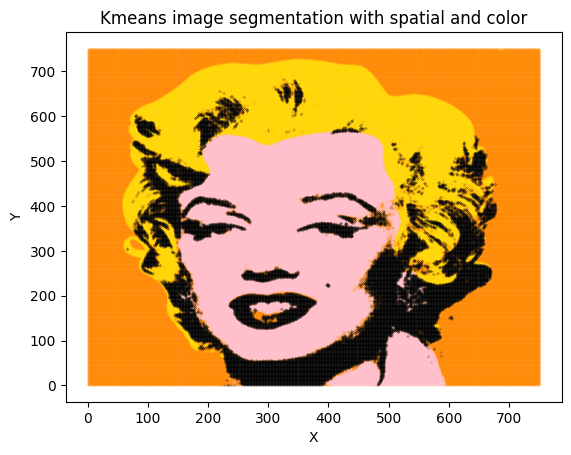

In [ ]:
color_map = {0: 'darkorange', 1: 'gold', 2: 'pink', 3:'black'}
for label in set(labels):
    mask = labelsPos == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=color_map[label], label=labelsPos, s = .01)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans image segmentation with spatial and color')
#plt.legend()
plt.show()

In [ ]:
color_map = {0: 'darkorange', 1: 'gold', 2: 'black', 3:'pink'}
for label in set(labels):
    mask = labelsPos == label
    plt.scatter(ypos[mask], xpos[::-1][mask], color=color_map[label], label=labelsPos, s = .1)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kmeans image segmentation with spatial and color')
#plt.legend()
plt.show()

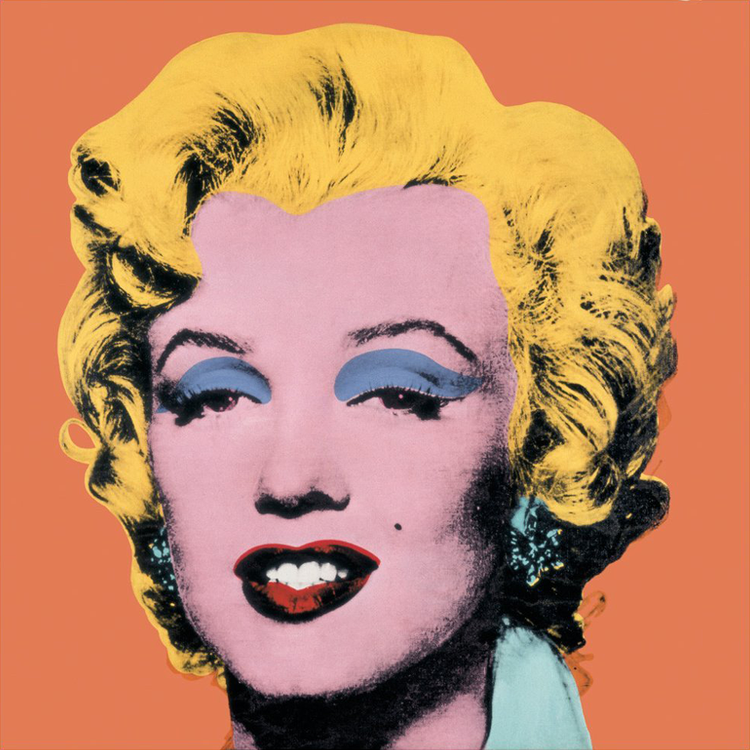

In [ ]:
orange

In [ ]:
orangePos = np.concatenate((.9*Xc, .9*Yc, 2*ORC, 2*OGC, 2*OBC), axis = 1) #try incorporating positional data

k = 4  # Number of clusters
kmeansPos = KMeans(n_clusters=k, init = OPosCenter) #need to set center value to be consistent choose mode colors want the most popular colors
kmeansPos.fit(orangePos)
labelsPos = kmeansPos.labels_
centersPos = kmeansPos.cluster_centers_
labelsPos.reshape((750,750))

array([[-0.34594859, -0.34594859,  0.46315541, -0.6463097 ,  0.33953199],
       [-0.34594859, -0.34502483,  0.85784306, -0.87918936, -0.01098801],
       [-0.34594859, -0.34410107,  0.77326714, -0.84037608, -0.16677468],
       ...,
       [ 0.34594859,  0.34410107,  0.66049923, -0.4910566 , -1.33517471],
       [ 0.34594859,  0.34502483,  0.77326714, -0.4910566 , -1.52990805],
       [ 0.34594859,  0.34594859,  0.94241899, -0.52986987, -1.80253472]])

When scaling all colors to be centered and using kmeans on color alone going from 4 groups to 5 group shows there are two black colors

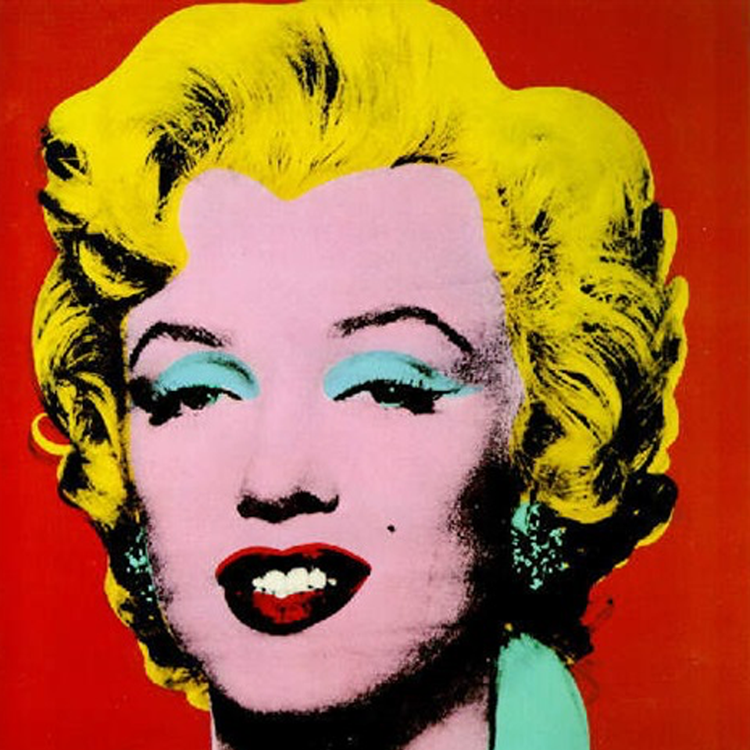

In [ ]:
RedUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203192094-MIQYNYEIJYJBY957F7T7/shot_red_marilyn_1964-19604.png?format=750w'

with urllib.request.urlopen(RedUrl) as response:
    image_data = response.read()

image_bytes = io.BytesIO(image_data)

image = Image.open(image_bytes)

red = image.convert("RGB") #gives image

red_array = np.array(red) #gives matrix

red_array

red

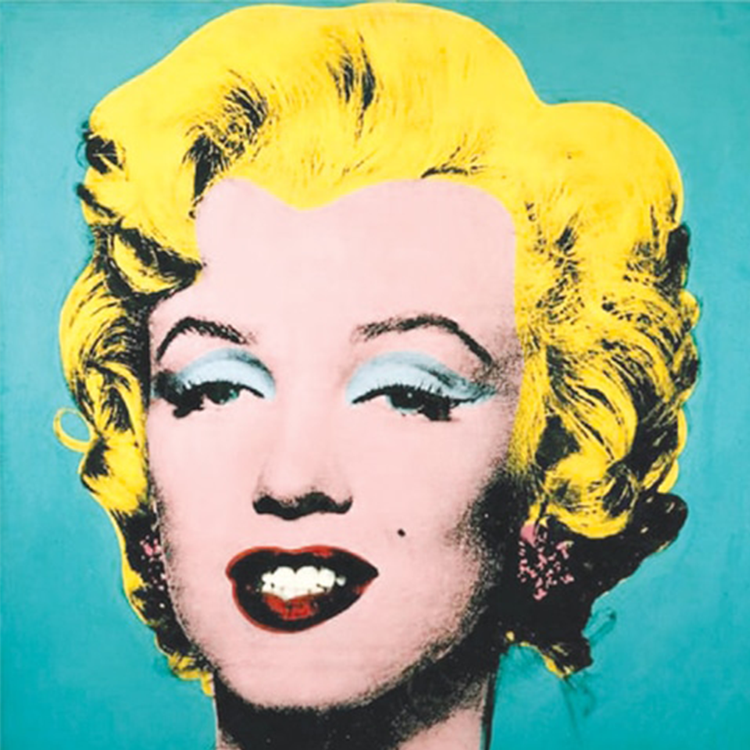

In [ ]:
TurqUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652213792503-2Q9A294S9UOFEBQZQQNP/shot_turq_marilyn_1964-19604.png?format=750w'

with urllib.request.urlopen(TurqUrl) as response:
    image_data = response.read()

image_bytes = io.BytesIO(image_data)

image = Image.open(image_bytes)

turq = image.convert("RGB") #gives image

turq_array = np.array(turq) #gives matrix

turq_array

turq

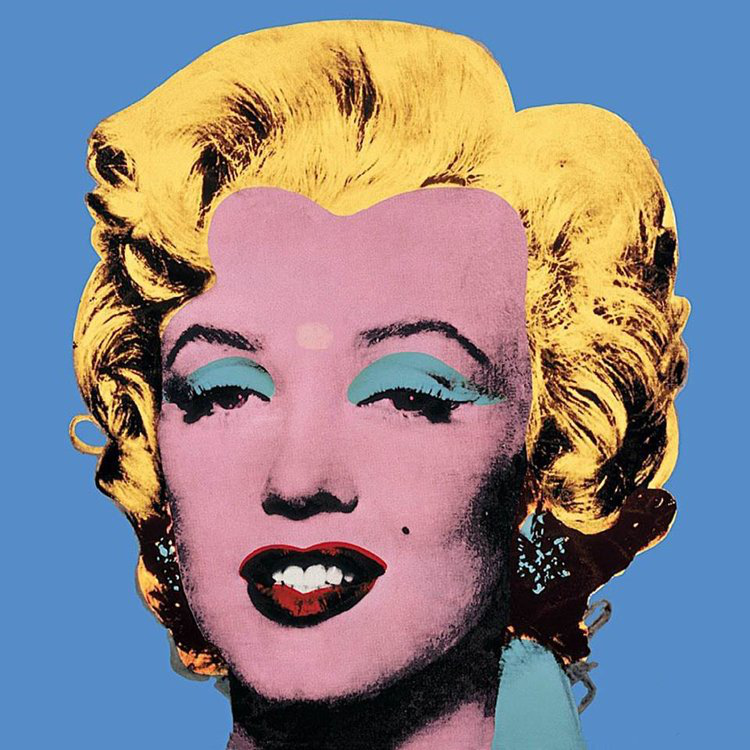

In [ ]:
BlueUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203207667-AHQD95AZ4Z1MCZ5B4C0N/shot_blue_marilyn_1964-19604.jpg?format=750w'

with urllib.request.urlopen(BlueUrl) as response:
    image_data = response.read()

image_bytes = io.BytesIO(image_data)

image = Image.open(image_bytes)

blue = image.convert("RGB") #gives image

blue_array = np.array(blue) #gives matrix

blue_array

blue

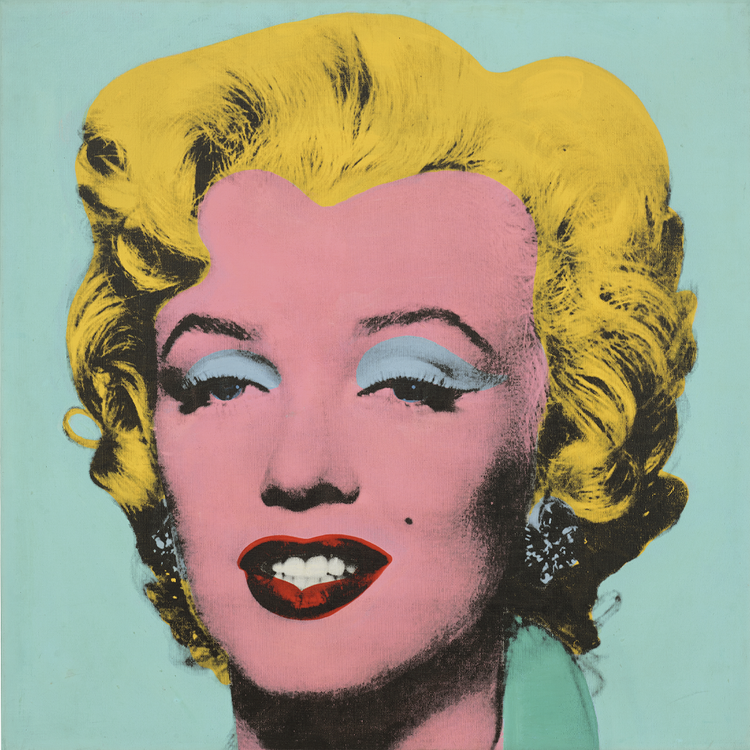

In [ ]:
EggUrl = 'https://images.squarespace-cdn.com/content/v1/5a98653d96e76f7f7dc569c7/1652203189304-UFR2YYN9605G0IW13YHJ/shot_eggblue_marilyn_1964-19604.png?format=750w'

with urllib.request.urlopen(EggUrl) as response:
    image_data = response.read()

image_bytes = io.BytesIO(image_data)

image = Image.open(image_bytes)

egg = image.convert("RGB") #gives image

egg_array = np.array(egg) #gives matrix

egg_array

egg